
<h1 align="center">From Linear Regression to Logistic Regression</h1> 


<img src='images/story_of_two_regressions.png' width=600/>

## On today's menu:

- Entrees

    1. Predicting a continouus response
    1. Predicting a categorical response (don't do this at home)
    


1. Main course
    1. What is it?
    1. How does it look?    
1. Second
    1. How to interprete coefficients
    
1. Desert
    1. Measuring performance
    1. Pros & Cons


Did you enjoy your meal?

  

## Classification 
**Classification techniques** are an essential part of machine learning and data mining applications<br>
Approximately **70%** of problems in Data Science are classification problems. There are lots of classification problems that are available, but the logistics regression is common and is a useful regression method for solving the binary classification problem.<br>
#### Multi-class
Another category of classification is Multinomial classification, which handles the issues where **multiple classes** are present in the target variable. For example, IRIS dataset a very famous example of multi-class classification.<br>Other examples are classifying article/blog/document category.

**Logistic Regression** is one of the most simple and commonly used Machine Learning algorithms for two-class classification. It is easy to implement and can be used as the baseline for any binary classification problem. Its basic fundamental concepts are also constructive in **deep learning**.<br>
Logistic regression describes and estimates the relationship between one dependent binary variable and independent variables.

<img src='images/entrees.png' width=600/>

# Entrees - Whet your appetite before the banquet

In [1]:
import pandas as pd
import numpy as np

[Data Source](https://www.kaggle.com/openfoodfacts/world-food-facts/version/5#)


In [2]:
food = pd.read_csv('foodinfo.csv')

In [3]:
target = 'nutrition-score-uk_100g'
predictor = 'energy_100g'

food.sort_values(predictor, ascending=False,inplace=True)
food.head()

,product_name,additives_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,nutrition-score-uk_100g
36779,Instant Aka Miso Soup,4.0,14644.0,10.00,0.00,40.00,0.00,20.00,20.06600,20.0
89827,"Flave!, Assorted Fish",6.0,14347.0,0.00,0.00,80.95,50.00,0.00,0.06096,20.0
27725,Lemon Cake,1.0,13213.0,12.28,2.63,45.61,29.82,3.51,0.71374,21.0
51357,"Crema Salvadorena, Soft Blend Dairy Spread",3.0,10966.0,24.14,13.79,6.90,6.90,3.45,1.40208,27.0
202105,"Sir Norman Baker, Pilipit",0.0,8715.0,25.00,25.00,62.50,16.67,8.33,0.33782,24.0


## Predicting a Continuous Response

#### Question 1
Let's say that we want to predict **nutrition-score**<br>
Our only feature is **energy**.<br>
How could we do it using machine learning?

### Visualisation
#### Question 2
How would we **visualize** this model?

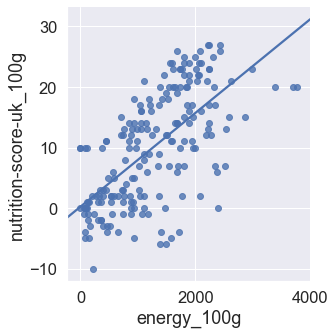

In [4]:
### Your code here





#### Question 3
How do you fit a linear regression model?

In [5]:
### Your code here





### Interpreting linear regression coefficients
Linear regression equation: $y = \beta_0 + \beta_1x$

#### Question 4
What nutrition score do we expect for an energy value of 150?<br>
(Don't use the predict method)

In [8]:
### Your code here





array([0.98717998])

## Predicting a Categorical Response

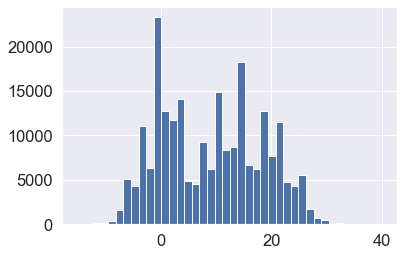

In [10]:
# examine nutrition score
y.hist(bins=40)

In [11]:
# It seems we have a bimodal distribution
# Let's consider anything 8 or over 'good food'
food['good'] = (food[target]>=8).astype(int)
food.head()

,product_name,additives_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,nutrition-score-uk_100g,good
36779,Instant Aka Miso Soup,4.0,14644.0,10.00,0.00,40.00,0.00,20.00,20.06600,20.0,1
89827,"Flave!, Assorted Fish",6.0,14347.0,0.00,0.00,80.95,50.00,0.00,0.06096,20.0,1
27725,Lemon Cake,1.0,13213.0,12.28,2.63,45.61,29.82,3.51,0.71374,21.0,1
51357,"Crema Salvadorena, Soft Blend Dairy Spread",3.0,10966.0,24.14,13.79,6.90,6.90,3.45,1.40208,27.0,1
202105,"Sir Norman Baker, Pilipit",0.0,8715.0,25.00,25.00,62.50,16.67,8.33,0.33782,24.0,1


Let's change our task, so that we're predicting **good** using **energy**. Let's visualize the relationship to figure out how to do this:

Text(0, 0.5, 'good')

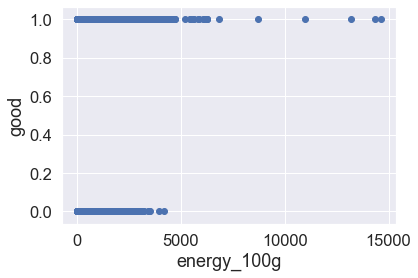

In [12]:
plt.scatter(food[predictor], food['good'])
plt.xlabel(predictor)
plt.ylabel('good')

Let's draw a **regression line**, like we did before:

In [13]:
# fit a linear regression model and store the predictions
y = food['good']
linreg.fit(X, y)
food['good_pred'] = linreg.predict(X)

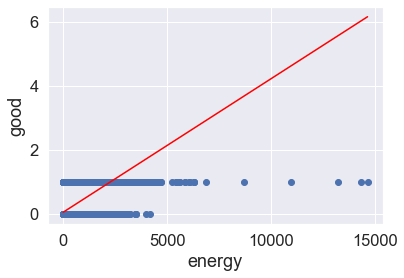

In [14]:
# scatter plot that includes the regression line
plt.scatter(X, y)
plt.plot(X, food['good_pred'], color='red')
plt.xlabel('energy')
plt.ylabel('good')
plt.show()

#### Question 5
If **energy=2500**, what class do we predict for household?<br>
And for **energy=5000**?
How would you solve this problem? (hint: have a look at np.where documentation)

In [ ]:
### Your code here





<img src='images/main_course.png' width=600/>

# Main course - Logistic Regression

## What does it do?
We will continue using a two-step process:

- Logistic regression outputs the **probabilities of a specific class**
- Those probabilities can be converted into **class predictions**

## What is special about it?
The **logistic function** has some nice properties:

- Takes on an "s" shape instead of a straight line
- Output is bounded by 0 and 1 instead of ± infinity

https://www.statisticssolutions.com/assumptions-of-logistic-regression/

## How does it work?
**Linear regression:** continuous response is modeled as a linear combination of the features:

$$y = \beta_0 + \beta_1x$$

**Logistic regression:** log-odds of a categorical response being "true" (1) is modeled as a linear combination of the features:

$$\log \left({p\over 1-p}\right) = \beta_0 + \beta_1x$$

This is called the **logit function**.

## Back to coding

In [18]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9, solver='lbfgs')
logreg.fit(X, y)
food['good_pred_class_2'] = logreg.predict(X)

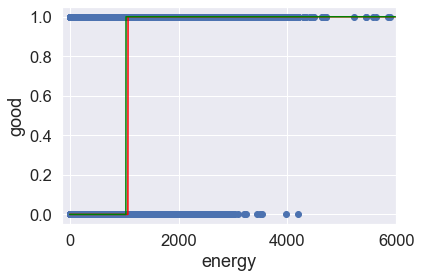

In [19]:
# plot the class predictions
plt.scatter(X, y)
plt.plot(X, food.good_pred_class, color='red')
plt.plot(X, food.good_pred_class_2, color='green')
plt.xlabel('energy')
plt.ylabel('good')
plt.xlim(-150,6000)
plt.ylim(-0.05,1.05)
plt.show()

## Working with probabilities
What if we wanted the **predicted probabilities** instead of just the **class predictions**, to understand how confident we are in a given prediction?

In [20]:
# examine some example predictions
print(logreg.predict_proba(np.array([[500]])))
print(logreg.predict_proba(np.array([[1000]])))
print(logreg.predict_proba(np.array([[1500]])))

[[0.80035313 0.19964687]]
[[0.52202933 0.47797067]]
[[0.22932014 0.77067986]]


The first column indicates the predicted probability of **class 0**, and the second column indicates the predicted probability of **class 1**.

In [21]:
# store the predicted probabilites of class 1
food['good_pred_prob'] = logreg.predict_proba(X)[:, 1]

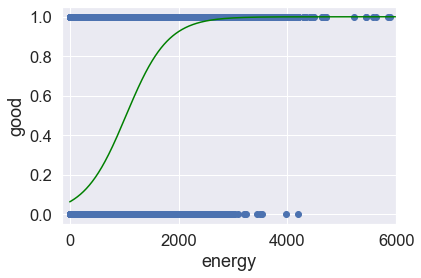

In [22]:
# plot the predicted probabilities
plt.scatter(X, y)
plt.plot(X, food.good_pred_prob, color='green')
plt.xlabel('energy')
plt.ylabel('good')
plt.xlim(-150,6000)
plt.ylim(-0.05,1.05)
plt.show()

<img src='images/second_course.png' width=600/>

# Second course - Interpreting coefficients

### Probability, odds, e, log, log-odds

$$probability = \frac {one\ outcome} {all\ outcomes}$$

$$odds = \frac {one\ outcome} {all\ other\ outcomes}$$

Examples:

- Dice roll of 1: probability = 1/6, odds = 1/5
- Even dice roll: probability = 3/6, odds = 3/3 = 1
- Dice roll less than 5: probability = 4/6, odds = 4/2 = 2

$$odds = \frac {probability} {1 - probability}$$

$$probability = \frac {odds} {1 + odds}$$

### Back to the code

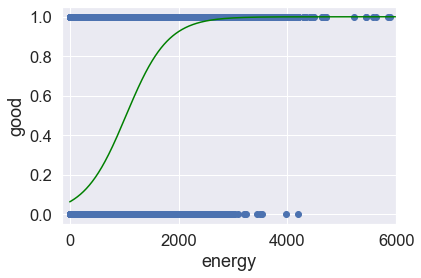

In [23]:
# plot the predicted probabilities again
plt.scatter(X, y)
plt.plot(X, food.good_pred_prob, color='green')
plt.xlabel('energy')
plt.ylabel('good')
plt.xlim(-150,6000)
plt.ylim(-0.05,1.05)
plt.show()

$$\log \left({p\over 1-p}\right) = \beta_0 + \beta_1x$$

In [170]:
logreg.intercept_

array([-2.68883132])

In [171]:
logreg.coef_

array([[0.00260066]])

#### Calculating the probability based on an energy value

In [172]:
# compute predicted log-odds for energy=1500 using the equation
logodds = logreg.intercept_ + logreg.coef_[0] * 1500
logodds

array([-2.68883132])

In [173]:
# convert log-odds to odds
odds = np.exp(logodds)
odds

array([0.06796032])

In [28]:
# convert odds to probability
prob = odds/(1 + odds)
prob

array([0.77067986])

#### Verifying

In [29]:
# compute predicted probability for energy=1500 using the predict_proba method
logreg.predict_proba(np.array([[1500]]))[:, 1]

array([0.77067986])

In [30]:
# examine the coefficients
dict(zip([predictor], logreg.coef_[0]))

{'energy_100g': 0.002600656917953369}

**Interpretation:** A 1000 unit increase in 'al' is associated with a 2.6 unit increase in the log-odds of 'good'.

#### Running an increment of probabilities

In [31]:
# increasing energy by 1000 (so that energy =2500) increases the log-odds by 2.6
logodds = 1.21215405 + 1000*0.002600656917953369 # original log-odds + 1000*coefficient
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

0.9783912426436584

In [32]:
# compute predicted probability for energy=2500 using the predict_proba method
logreg.predict_proba(np.array([[2500]]))[:, 1]

array([0.97839124])

**Bottom line:** Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

Changing the $\beta_0$ value shifts the curve **horizontally**, whereas changing the $\beta_1$ value changes the **slope** of the curve.

<img src='images/desert.png' width=600/>

# Desert and coffee - Evaluation / Pros & Cons / Other applications

## Evaluating a classifier

In [33]:
food.head()

,product_name,additives_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,nutrition-score-uk_100g,good,good_pred,good_pred_class,good_pred_class_2,good_pred_prob
36779,Instant Aka Miso Soup,4.0,14644.0,10.00,0.00,40.00,0.00,20.00,20.06600,20.0,1,6.152343,1,1,1.0
89827,"Flave!, Assorted Fish",6.0,14347.0,0.00,0.00,80.95,50.00,0.00,0.06096,20.0,1,6.028668,1,1,1.0
27725,Lemon Cake,1.0,13213.0,12.28,2.63,45.61,29.82,3.51,0.71374,21.0,1,5.556455,1,1,1.0
51357,"Crema Salvadorena, Soft Blend Dairy Spread",3.0,10966.0,24.14,13.79,6.90,6.90,3.45,1.40208,27.0,1,4.620775,1,1,1.0
202105,"Sir Norman Baker, Pilipit",0.0,8715.0,25.00,25.00,62.50,16.67,8.33,0.33782,24.0,1,3.683429,1,1,1.0


#### Logistic regression on the whole dataset

In [162]:
from sklearn.model_selection import train_test_split
n = 9000
food2 = food.sample(n,random_state=42)
X = food2.iloc[:,5:-6-2]
y = food2['good']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=3000,random_state=666)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=3000,random_state=42)

In [163]:
log_model = LogisticRegression(C=1e9, solver='lbfgs')

log_model.fit(X_train,y_train)

train_prob = log_model.predict_proba(X_train)[:,1]
val_prob = log_model.predict_proba(X_val)[:,1]
test_prob = log_model.predict_proba(X_test)[:,1]

In [164]:
list(zip(X.columns,list(log_model.coef_[0])))

[('carbohydrates_100g', 0.003928434635440589),
 ('sugars_100g', 0.06679654502412632)]

In [165]:
from sklearn.metrics import roc_auc_score
train = roc_auc_score(y_train,train_prob)
val = roc_auc_score(y_val,val_prob)
test = roc_auc_score(y_test,test_prob)
print(round(train,2),round(val,2),round(test,2))

0.69 0.67 0.67


In [168]:
def annot(fpr,tpr,thr):
    k=0
    for i,j in zip(fpr,tpr):
        if k %75 == 0:
            plt.annotate(round(thr[k],2),xy=(i,j), textcoords='data')
        k+=1

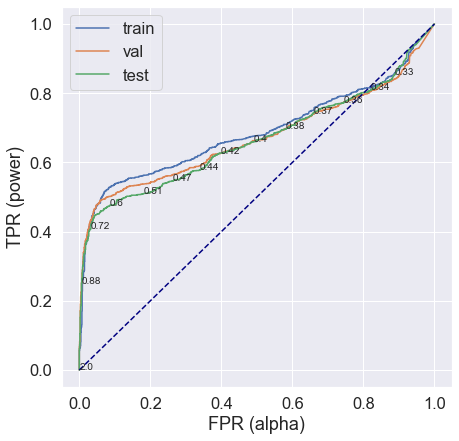

In [169]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(7,7))

for data in [[y_train, train_prob],[y_val, val_prob],[y_test, test_prob]]:
    fpr, tpr, threshold = roc_curve(data[0], data[1])
    plt.plot(fpr, tpr)
annot(fpr, tpr, threshold)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.ylabel('TPR (power)')
plt.xlabel('FPR (alpha)')
plt.legend(['train','val','test'])
plt.show()

[A video that explains ROC](https://www.youtube.com/watch?v=OAl6eAyP-yo)

## Comparing Logistic Regression with Other Models

Advantages of logistic regression:

- Highly interpretable (if you remember how)
- Model training and prediction are fast
- No tuning is required (excluding regularization)
- Features don't need scaling
- Can perform well with a small number of observations
- Outputs well-calibrated predicted probabilities

Disadvantages of logistic regression:

- Presumes a linear relationship between the features and the log-odds of the response
- Performance is (generally) not competitive with the best supervised learning methods
- Can't automatically learn feature interactions

## Multi-class classification
We have covered how this works for **binary classification problems** (two response classes).<br>
But what about **multi-class classification problems** (more than two response classes)?

- Most common solution for classification models is **"one-vs-all"** (also known as **"one-vs-rest"**):
  - Decompose the problem into multiple binary classification problems
- **Multinomial logistic regression** can solve this as a single problem

<h1 align="center">Did you enjoy your meal? - Exit ticket</h1> 

https://forms.gle/WsjrvNXZd1Y5ZdBP9

<h1 align="center">Appendices</h1> 

## Do you still want more math?

The logit function can be rearranged into the **logistic function**:

$$p = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$$

To find $\beta_{0}$ and $\beta_{1}$ we try to maximize likelihood function $$ \ell(\beta_{0}, \beta_{1}) = \prod_{i: y_1 =1} p(x_i)\prod_{i^{\prime}: y_{i^{\prime}}=0} (1- p(x_{i}))$$ 




[Least squares vs ML](https://stats.stackexchange.com/questions/143705/maximum-likelihood-method-vs-least-squares-method)

## Do you want to get your hands dirty with logodds?

In [40]:
# create a table of probability versus odds
table = pd.DataFrame({'probability':[0.1, 0.2, 0.25, 0.5, 0.6, 0.8, 0.9]})
table['odds'] = table.probability/(1 - table.probability)
table

,probability,odds
0,0.10,0.111111
1,0.20,0.250000
2,0.25,0.333333
3,0.50,1.000000
4,0.60,1.500000
5,0.80,4.000000
6,0.90,9.000000


What is **e**? It is the base rate of growth shared by all continually growing processes:

In [41]:
# exponential function: e^1
np.exp(1)

2.718281828459045

What is a **(natural) log**? It gives you the time needed to reach a certain level of growth:

In [42]:
# time needed to grow 1 unit to 2.718 units
np.log(2.718)

0.999896315728952

It is also the **inverse** of the exponential function:

In [43]:
np.log(np.exp(5))

5.0

In [44]:
table

,probability,odds
0,0.10,0.111111
1,0.20,0.250000
2,0.25,0.333333
3,0.50,1.000000
4,0.60,1.500000
5,0.80,4.000000
6,0.90,9.000000


In [45]:
# add log-odds to the table
table['logodds'] = np.log(table.odds)

